In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np

## Initialize model at full charge to 4.1V

In [25]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Chen2020)
parameter_values.update({
    "SEI kinetic rate constant [m.s-1]": 1e-15,
    "SEI resistivity [Ohm.m]": 0,
})
spm = pybamm.lithium_ion.SPM({"sei": "ec reaction limited"})

In [26]:
esoh_model = pybamm.lithium_ion.ElectrodeSOH()
esoh_sim = pybamm.Simulation(esoh_model, parameter_values=parameter_values)
param = spm.param

Vmin = 2.5
Vmax = 4.2
Cn = parameter_values.evaluate(param.C_n_init)
Cp = parameter_values.evaluate(param.C_p_init)
n_Li_init = parameter_values.evaluate(param.n_Li_particles_init)
c_n_max = parameter_values.evaluate(param.c_n_max)
c_p_max = parameter_values.evaluate(param.c_p_max)

esoh_sol = esoh_sim.solve(
    [0],
    inputs={"V_min": Vmin, "V_max": Vmax, "C_n": Cn, "C_p": Cp, "n_Li": n_Li_init},
)
print(esoh_sol["x_100"].data[0])
print(esoh_sol["y_100"].data[0])

0.9045388808869798
0.26790222708570466


## One cycle

In [27]:
parameter_values.update(
    {
        "Initial concentration in negative electrode [mol.m-3]": esoh_sol["x_100"].data[0] * c_n_max,
        "Initial concentration in positive electrode [mol.m-3]": esoh_sol["y_100"].data[0] * c_p_max,
    }
)
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
     f"Charge at 1C until {Vmax}V", 
     f"Hold at {Vmax}V until C/50")
])
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
spm_sol = sim.solve()

2021-02-19 14:51:15,259 - [NOTICE] simulation.solve(499): Cycle 1/1 (28.369 ms elapsed) --------------------
2021-02-19 14:51:15,260 - [NOTICE] simulation.solve(526): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:51:15,668 - [NOTICE] simulation.solve(526): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-19 14:51:15,997 - [NOTICE] simulation.solve(526): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:51:16,285 - [NOTICE] simulation.solve(526): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:51:16,905 - [NOTICE] simulation.solve(580): Finish experiment simulation, took 1.674 s


In [5]:
spm_sol.plot(["Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=3.614634167152469, step=0.03614634167152469)…

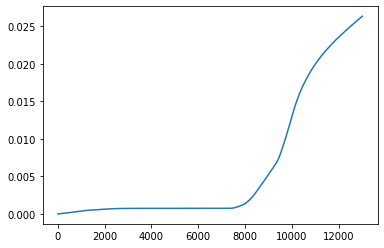

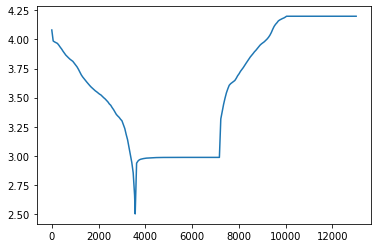

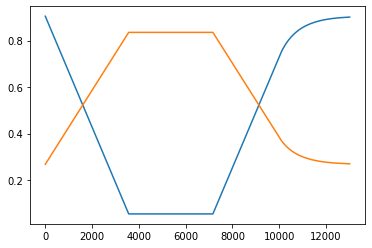

In [6]:
plt.plot(spm_sol["Time [s]"].data, spm_sol["Loss of Lithium Inventory [%]"].data)
plt.figure()
plt.plot(spm_sol["Time [s]"].data, spm_sol["Terminal voltage [V]"].data)
plt.figure()
plt.plot(spm_sol["Time [s]"].data, spm_sol["Negative electrode SOC"].data)
plt.plot(spm_sol["Time [s]"].data, spm_sol["Positive electrode SOC"].data)

In [7]:
lli = spm_sol["Loss of Lithium Inventory [%]"].data
lli_one_cycle = lli[-1] - lli[0]

## 10 cycles

In [8]:
pybamm.set_logging_level("NOTICE")
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
    f"Charge at 1C until {Vmax}V", 
    f"Hold at {Vmax}V until C/50")
] * 100)
spm = pybamm.lithium_ion.SPM({"sei": "ec reaction limited"})
sim_100 = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
spm_sol_100 = sim_100.solve()

2021-02-19 14:29:21,599 - [NOTICE] simulation.solve(499): Cycle 1/100 (23.508 ms elapsed) --------------------
2021-02-19 14:29:21,600 - [NOTICE] simulation.solve(526): Cycle 1/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:29:21,924 - [NOTICE] simulation.solve(526): Cycle 1/100, step 2/4: Rest for 1 hour
2021-02-19 14:29:22,164 - [NOTICE] simulation.solve(526): Cycle 1/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:29:22,401 - [NOTICE] simulation.solve(526): Cycle 1/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:29:22,935 - [NOTICE] simulation.solve(499): Cycle 2/100 (1.359 s elapsed) --------------------
2021-02-19 14:29:22,935 - [NOTICE] simulation.solve(526): Cycle 2/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:29:23,215 - [NOTICE] simulation.solve(526): Cycle 2/100, step 2/4: Rest for 1 hour
2021-02-19 14:29:23,479 - [NOTICE] simulation.solve(526): Cycle 2/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:29:23,736 - [NOTICE] simulation.solve(526

2021-02-19 14:29:41,046 - [NOTICE] simulation.solve(526): Cycle 16/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:29:41,419 - [NOTICE] simulation.solve(526): Cycle 16/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:29:41,954 - [NOTICE] simulation.solve(499): Cycle 17/100 (20.378 s elapsed) --------------------
2021-02-19 14:29:41,954 - [NOTICE] simulation.solve(526): Cycle 17/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:29:42,267 - [NOTICE] simulation.solve(526): Cycle 17/100, step 2/4: Rest for 1 hour
2021-02-19 14:29:42,513 - [NOTICE] simulation.solve(526): Cycle 17/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:29:42,749 - [NOTICE] simulation.solve(526): Cycle 17/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:29:43,191 - [NOTICE] simulation.solve(499): Cycle 18/100 (21.615 s elapsed) --------------------
2021-02-19 14:29:43,192 - [NOTICE] simulation.solve(526): Cycle 18/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:29:43,461 - [NOTICE] sim

2021-02-19 14:30:00,696 - [NOTICE] simulation.solve(526): Cycle 32/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:30:00,967 - [NOTICE] simulation.solve(526): Cycle 32/100, step 2/4: Rest for 1 hour
2021-02-19 14:30:01,216 - [NOTICE] simulation.solve(526): Cycle 32/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:30:01,444 - [NOTICE] simulation.solve(526): Cycle 32/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:30:01,888 - [NOTICE] simulation.solve(499): Cycle 33/100 (40.311 s elapsed) --------------------
2021-02-19 14:30:01,888 - [NOTICE] simulation.solve(526): Cycle 33/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:30:02,152 - [NOTICE] simulation.solve(526): Cycle 33/100, step 2/4: Rest for 1 hour
2021-02-19 14:30:02,398 - [NOTICE] simulation.solve(526): Cycle 33/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:30:02,658 - [NOTICE] simulation.solve(526): Cycle 33/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:30:03,129 - [NOTICE] simulation.solve

2021-02-19 14:30:20,987 - [NOTICE] simulation.solve(526): Cycle 47/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:30:21,488 - [NOTICE] simulation.solve(499): Cycle 48/100 (59.911 s elapsed) --------------------
2021-02-19 14:30:21,489 - [NOTICE] simulation.solve(526): Cycle 48/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:30:21,785 - [NOTICE] simulation.solve(526): Cycle 48/100, step 2/4: Rest for 1 hour
2021-02-19 14:30:22,055 - [NOTICE] simulation.solve(526): Cycle 48/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:30:22,314 - [NOTICE] simulation.solve(526): Cycle 48/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:30:22,760 - [NOTICE] simulation.solve(499): Cycle 49/100 (1 minute, 1 second elapsed) --------------------
2021-02-19 14:30:22,760 - [NOTICE] simulation.solve(526): Cycle 49/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:30:23,034 - [NOTICE] simulation.solve(526): Cycle 49/100, step 2/4: Rest for 1 hour
2021-02-19 14:30:23,284 - [NOTICE] s

2021-02-19 14:30:40,585 - [NOTICE] simulation.solve(499): Cycle 63/100 (1 minute, 19 seconds elapsed) --------------------
2021-02-19 14:30:40,586 - [NOTICE] simulation.solve(526): Cycle 63/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:30:40,869 - [NOTICE] simulation.solve(526): Cycle 63/100, step 2/4: Rest for 1 hour
2021-02-19 14:30:41,110 - [NOTICE] simulation.solve(526): Cycle 63/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:30:41,365 - [NOTICE] simulation.solve(526): Cycle 63/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:30:41,868 - [NOTICE] simulation.solve(499): Cycle 64/100 (1 minute, 20 seconds elapsed) --------------------
2021-02-19 14:30:41,869 - [NOTICE] simulation.solve(526): Cycle 64/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:30:42,150 - [NOTICE] simulation.solve(526): Cycle 64/100, step 2/4: Rest for 1 hour
2021-02-19 14:30:42,397 - [NOTICE] simulation.solve(526): Cycle 64/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:30:42,64

2021-02-19 14:30:59,563 - [NOTICE] simulation.solve(526): Cycle 78/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:30:59,860 - [NOTICE] simulation.solve(526): Cycle 78/100, step 2/4: Rest for 1 hour
2021-02-19 14:31:00,126 - [NOTICE] simulation.solve(526): Cycle 78/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:31:00,365 - [NOTICE] simulation.solve(526): Cycle 78/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:31:00,826 - [NOTICE] simulation.solve(499): Cycle 79/100 (1 minute, 39 seconds elapsed) --------------------
2021-02-19 14:31:00,827 - [NOTICE] simulation.solve(526): Cycle 79/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:31:01,109 - [NOTICE] simulation.solve(526): Cycle 79/100, step 2/4: Rest for 1 hour
2021-02-19 14:31:01,389 - [NOTICE] simulation.solve(526): Cycle 79/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:31:01,665 - [NOTICE] simulation.solve(526): Cycle 79/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:31:02,143 - [NOTICE] simu

2021-02-19 14:31:18,852 - [NOTICE] simulation.solve(526): Cycle 93/100, step 2/4: Rest for 1 hour
2021-02-19 14:31:19,106 - [NOTICE] simulation.solve(526): Cycle 93/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:31:19,365 - [NOTICE] simulation.solve(526): Cycle 93/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:31:19,852 - [NOTICE] simulation.solve(499): Cycle 94/100 (1 minute, 58 seconds elapsed) --------------------
2021-02-19 14:31:19,852 - [NOTICE] simulation.solve(526): Cycle 94/100, step 1/4: Discharge at 1C until 2.5V
2021-02-19 14:31:20,125 - [NOTICE] simulation.solve(526): Cycle 94/100, step 2/4: Rest for 1 hour
2021-02-19 14:31:20,369 - [NOTICE] simulation.solve(526): Cycle 94/100, step 3/4: Charge at 1C until 4.2V
2021-02-19 14:31:20,622 - [NOTICE] simulation.solve(526): Cycle 94/100, step 4/4: Hold at 4.2V until C/50
2021-02-19 14:31:21,079 - [NOTICE] simulation.solve(499): Cycle 95/100 (1 minute, 59 seconds elapsed) --------------------
2021-02-19 14:31:21,079 -

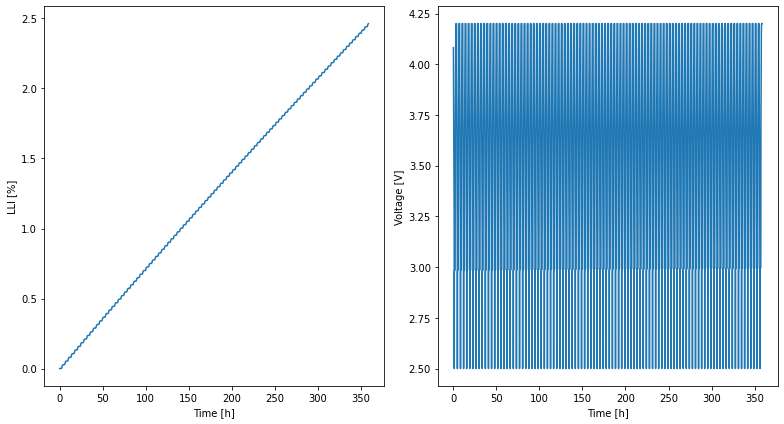

In [9]:
fig, ax = plt.subplots(1,2,figsize=(11,6))

ax[0].plot(spm_sol_100["Time [h]"].data, spm_sol_100["Loss of Lithium Inventory [%]"].data)
ax[0].set_xlabel("Time [h]")
ax[0].set_ylabel("LLI [%]")
ax[1].plot(spm_sol_100["Time [h]"].data, spm_sol_100["Terminal voltage [V]"].data)
ax[1].set_xlabel("Time [h]")
ax[1].set_ylabel("Voltage [V]")

fig.tight_layout()
OUTPUT_DIR = "/Users/vsulzer/Google Drive/PCL_Sulzer/"
fig.savefig(OUTPUT_DIR + "100_cycles.eps", dpi=1000)

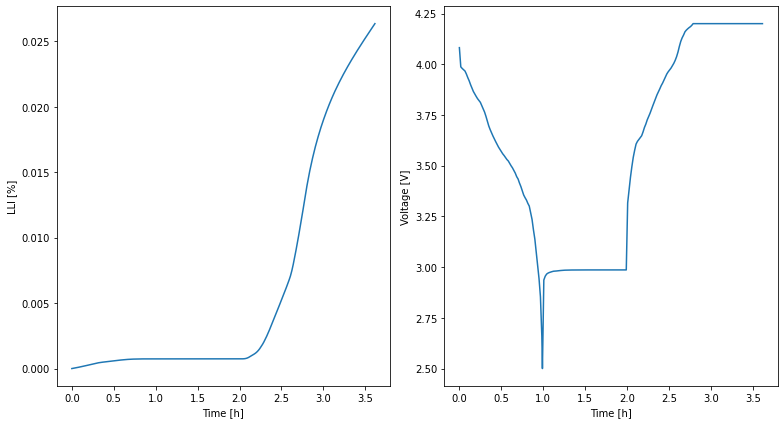

In [10]:
fig, ax = plt.subplots(1,2,figsize=(11,6))

ax[0].plot(spm_sol_100.cycles[0]["Time [h]"].data, spm_sol_100.cycles[0]["Loss of Lithium Inventory [%]"].data)
ax[0].set_xlabel("Time [h]")
ax[0].set_ylabel("LLI [%]")
ax[1].plot(spm_sol_100.cycles[0]["Time [h]"].data, spm_sol_100.cycles[0]["Terminal voltage [V]"].data)
ax[1].set_xlabel("Time [h]")
ax[1].set_ylabel("Voltage [V]")

fig.tight_layout()
fig.savefig(OUTPUT_DIR + "first_cycle.eps", dpi=1000)

In [11]:
lli_100 = spm_sol_100["Loss of Lithium Inventory [%]"].data
lli_100_cycles = lli_100[-1] - lli_100[0]

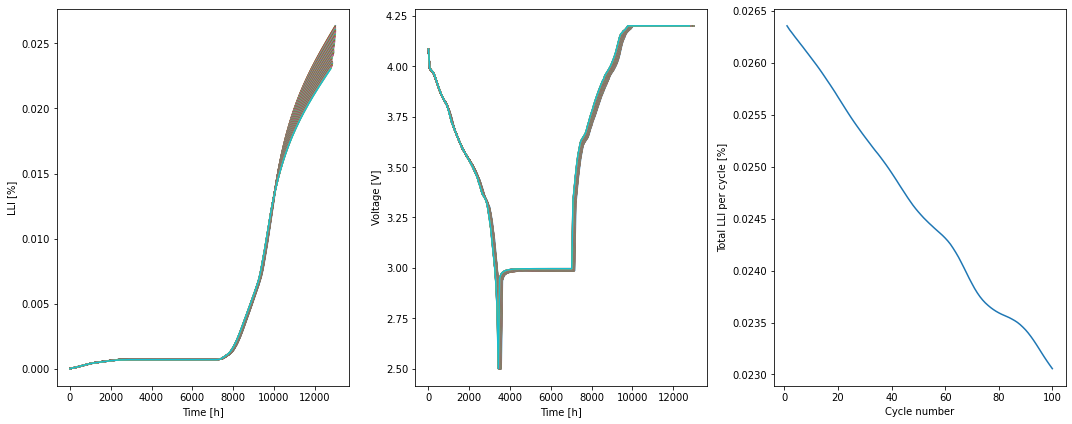

In [12]:

fig, ax = plt.subplots(1,3,figsize=(15,6))

all_lli = []
for cycle in spm_sol_100.cycles:
    t = cycle["Time [s]"].data
    lli = cycle["Loss of Lithium Inventory [%]"].data
    V = cycle["Terminal voltage [V]"].data

    ax[0].plot(t - t[0], lli-lli[0])
    ax[1].plot(t-t[0], V)
    
    all_lli.append(lli[-1]-lli[0])

ax[0].set_xlabel("Time [h]")
ax[0].set_ylabel("LLI [%]")    
ax[1].set_xlabel("Time [h]")
ax[1].set_ylabel("Voltage [V]")

ax[2].plot(range(1, len(all_lli)+1), all_lli)
ax[2].set_xlabel("Cycle number")
ax[2].set_ylabel("Total LLI per cycle [%]")

fig.tight_layout()
fig.savefig(OUTPUT_DIR + "cycles_comparison.eps", dpi=1000)

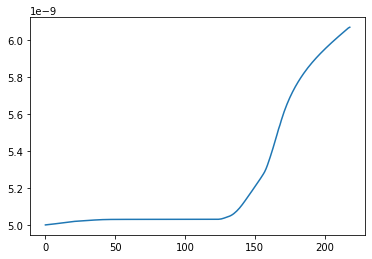

In [119]:
plt.figure()
plt.plot(spm_sol["X-averaged outer negative electrode sei thickness [m]"].data)

In [115]:
spm_sol.plot(["X-averaged outer negative electrode sei interfacial current density", "X-averaged negative electrode interfacial current density"])

interactive(children=(FloatSlider(value=0.0, description='t', max=3.614634167152469, step=0.03614634167152469)…

In [112]:
parameter_values.evaluate(param.c_ec_0_dim)

4541.0

### eSOH parameters


In [14]:
len(spm_sol_100.summary_variables.items())

47

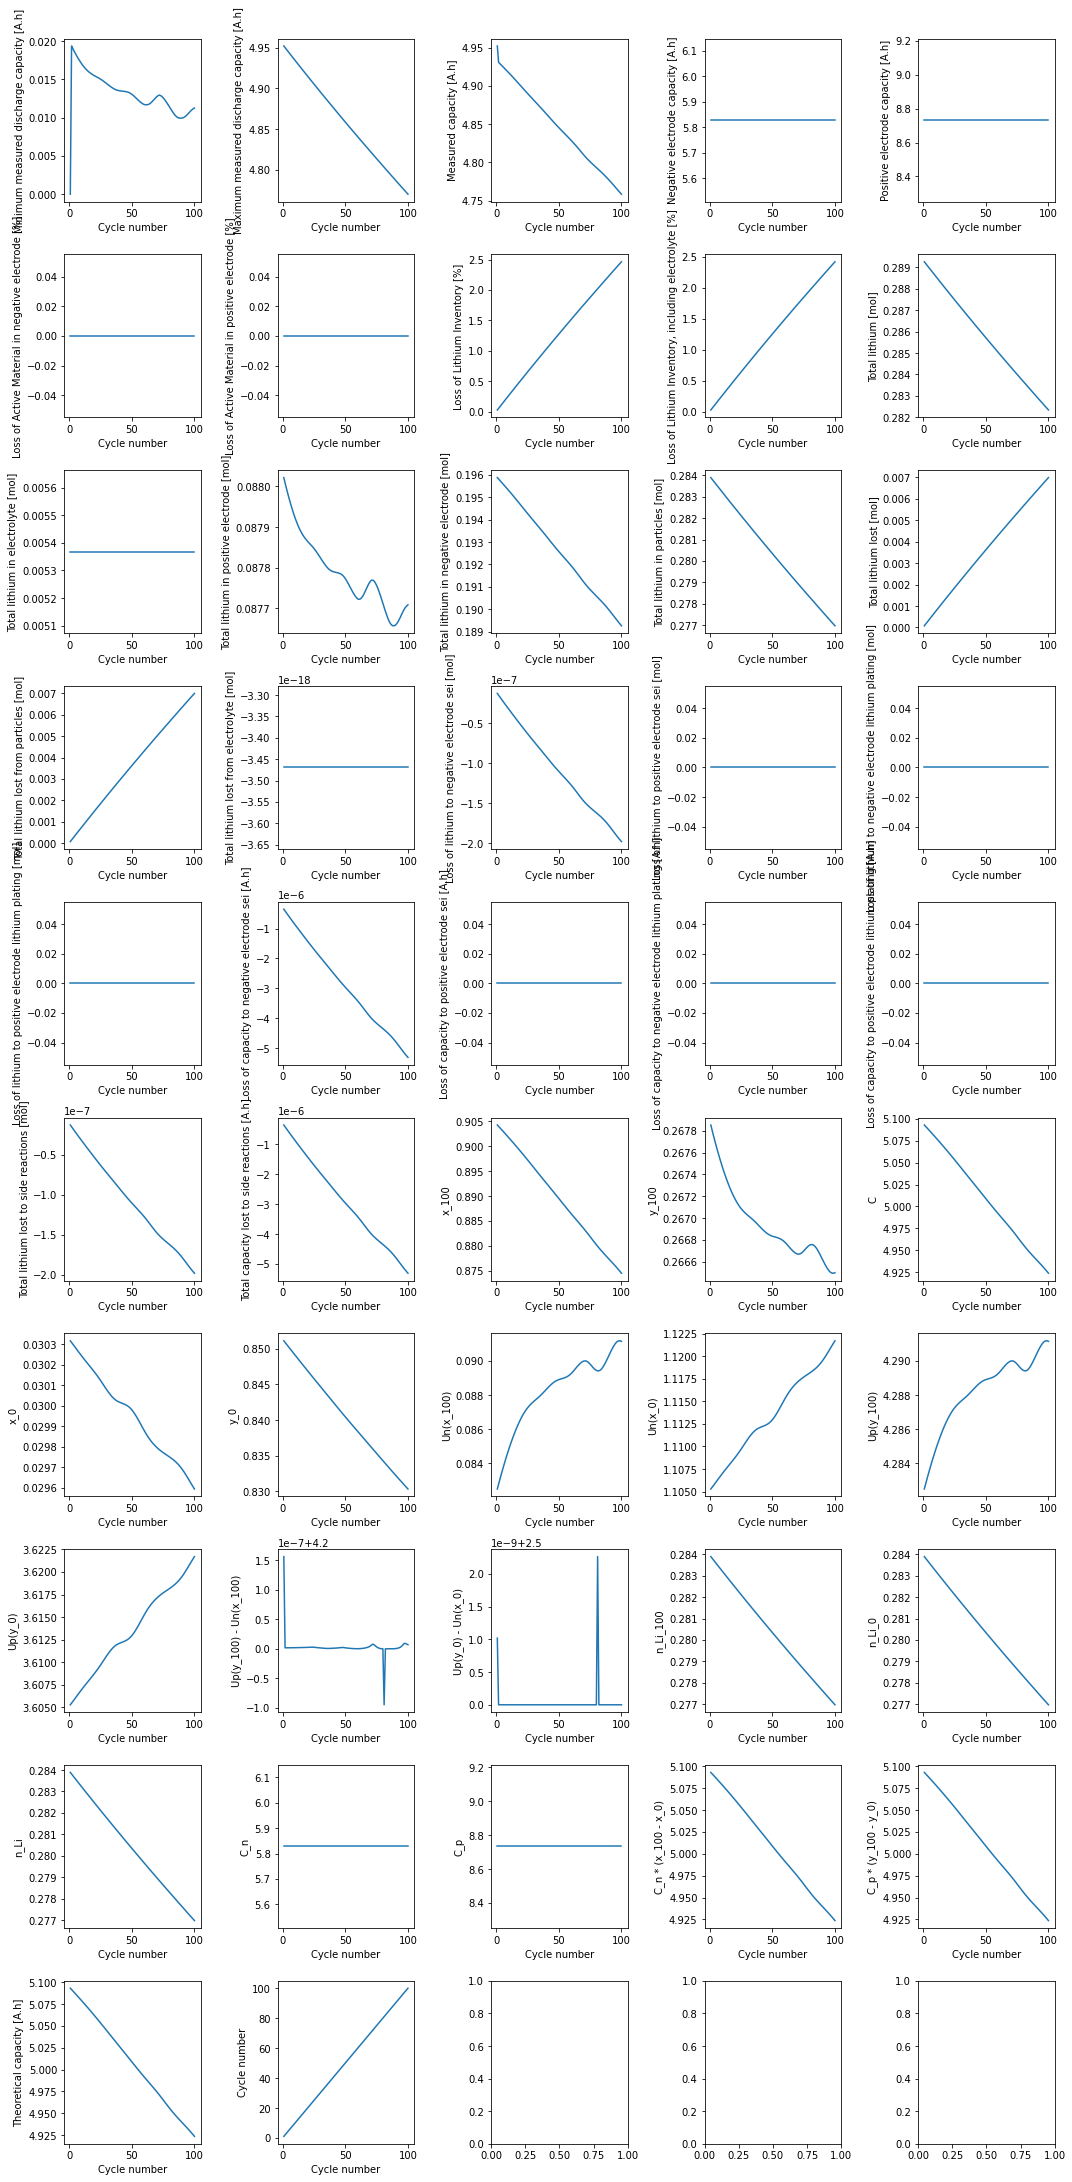

In [17]:
fig, axes = plt.subplots(10,5,figsize=(15,30))

for k, (name,val) in enumerate(spm_sol_100.summary_variables.items()):
    ax = axes.flat[k]
    ax.plot(spm_sol_100.summary_variables["Cycle number"],val)
    ax.set_xlabel("Cycle number")
    ax.set_ylabel(name)

# axes.flat[4].plot(range(1,101), all_nLi)
# axes.flat[4].set_xlabel("Cycle number")
# axes.flat[4].set_ylabel("n_Li")
# axes.flat[-1].plot(range(1,101), all_C)
# axes.flat[-1].set_xlabel("Cycle number")
# axes.flat[-1].set_ylabel("C")
# axes.flat[-1].set_ylim([2,5])
# axes.flat[-2].set_ylim([2,5])

fig.tight_layout()

## Accelerated simulations algorithm

### Constant extrapolation

Solve for 1 cycle

In [49]:
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
     f"Charge at 1C until {Vmax}V", 
     f"Hold at {Vmax}V until C/50")
])
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
spm_sol = sim.solve()

2021-02-19 15:13:18,428 - [NOTICE] simulation.solve(499): Cycle 1/1 (21.308 ms elapsed) --------------------
2021-02-19 15:13:18,428 - [NOTICE] simulation.solve(526): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-02-19 15:13:18,720 - [NOTICE] simulation.solve(526): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-19 15:13:18,939 - [NOTICE] simulation.solve(526): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-19 15:13:19,169 - [NOTICE] simulation.solve(526): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-19 15:13:19,656 - [NOTICE] simulation.solve(580): Finish experiment simulation, took 1.250 s


Check how well extrapolating 1 cycle does

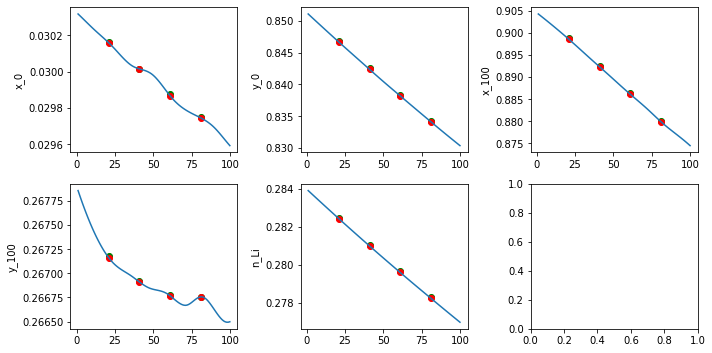

In [90]:
n_cycles_step = 20
cycle = 0

esoh_vars = ["x_0", "y_0", "x_100", "y_100", "n_Li"]

fig, ax = plt.subplots(2,3,figsize=(10,5))
for k, name in enumerate(esoh_vars):
    ax.flat[k].plot(spm_sol_100.summary_variables["Cycle number"], spm_sol_100.summary_variables[name])
    ax.flat[k].set_ylabel(name)

while cycle < len(spm_sol_100.cycles)-n_cycles_step:
    n_Li_cycle = spm_sol_100.cycles[cycle]["Total lithium in particles [mol]"].data
    n_Li_cycle_init = n_Li_cycle[0]
    delta_nLi_cycle = n_Li_cycle[0] - n_Li_cycle[-1]
    
    n_Li = n_Li_cycle_init - delta_nLi_cycle * n_cycles_step

    esoh_sol = esoh_sim.solve(
        [0],
        inputs={"V_min": Vmin, "V_max": Vmax, "C_n": Cn, "C_p": Cp, "n_Li": n_Li},
    )
    
    cycle += n_cycles_step
    for k, name in enumerate(esoh_vars):
        ax.flat[k].scatter(cycle+1,esoh_sol[name].data[0],color="g")
        ax.flat[k].scatter(cycle+1,spm_sol_100.summary_variables[name][cycle],color="r")
        
fig.tight_layout()

Use extrapolation to initialize next simulation

In [92]:
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
     f"Charge at 1C until {Vmax}V", 
     f"Hold at {Vmax}V until C/50")
])

cycle = 0
sim_acc = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
sim_acc.build()

In [93]:
sim_acc.built_model.set_initial_conditions_from(spm_sol_100)

KeyError: "'Outer SEI thickness' not found. Best matches are ['Outer negative electrode sei thickness', 'Outer positive electrode sei thickness', 'Total negative electrode sei thickness']"

In [91]:
sol_acc = []

while cycle < 100 - n_cycles_step:
    
    # Simulate one cycle
    sol = sim_acc.solve()
    
    n_Li_cycle = sol["Total lithium in particles [mol]"].data
    n_Li_cycle_init = n_Li_cycle[0]
    delta_nLi_cycle = n_Li_cycle[0] - n_Li_cycle[-1]
    
    n_Li = n_Li_cycle_init - delta_nLi_cycle * n_cycles_step

    esoh_sol = esoh_sim.solve(
        [0],
        inputs={"V_min": Vmin, "V_max": Vmax, "C_n": Cn, "C_p": Cp, "n_Li": n_Li},
    )
    
    cycle += n_cycles_step
    sol_acc.append(sol)
        
fig.tight_layout()

2021-02-19 16:47:07,703 - [NOTICE] simulation.solve(499): Cycle 1/1 (22.780 ms elapsed) --------------------
2021-02-19 16:47:07,703 - [NOTICE] simulation.solve(526): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-02-19 16:47:08,012 - [NOTICE] simulation.solve(526): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-19 16:47:08,250 - [NOTICE] simulation.solve(526): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-19 16:47:08,501 - [NOTICE] simulation.solve(526): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-19 16:47:09,001 - [NOTICE] simulation.solve(580): Finish experiment simulation, took 1.321 s
2021-02-19 16:47:09,037 - [NOTICE] simulation.solve(499): Cycle 1/1 (24.862 ms elapsed) --------------------
2021-02-19 16:47:09,037 - [NOTICE] simulation.solve(526): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-02-19 16:47:09,340 - [NOTICE] simulation.solve(526): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-19 16:47:09,560 - [NOTICE] simulation.solve(526): Cycle 1/1, step